In [246]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [247]:
# Load DataFile
data=pd.read_parquet('/content/drive/MyDrive/datasets/Truebeacon/data.parquet')
data.head()

,banknifty,nifty,tte
time,,,
2021-01-01 09:15:00,0.286058,0.199729,27
2021-01-01 09:16:00,0.285381,0.200433,27
2021-01-01 09:17:00,0.284233,0.200004,27
2021-01-01 09:18:00,0.286104,0.199860,27
2021-01-01 09:19:00,0.285539,0.198951,27


In [248]:
# Filter data for market hours (9:15 - 15:30)
market_open = datetime.strptime('09:15:00', '%H:%M:%S').time()
market_close = datetime.strptime('15:30:00', '%H:%M:%S').time()

data = data.between_time(market_open, market_close)


In [249]:
# Data representation inside data file
data.head()

,banknifty,nifty,tte
time,,,
2021-01-01 09:15:00,0.286058,0.199729,27
2021-01-01 09:16:00,0.285381,0.200433,27
2021-01-01 09:17:00,0.284233,0.200004,27
2021-01-01 09:18:00,0.286104,0.199860,27
2021-01-01 09:19:00,0.285539,0.198951,27


In [250]:
data.isna()

,banknifty,nifty,tte
time,,,
2021-01-01 09:15:00,False,False,False
2021-01-01 09:16:00,False,False,False
2021-01-01 09:17:00,False,False,False
2021-01-01 09:18:00,False,False,False
2021-01-01 09:19:00,False,False,False
...,...,...,...
2022-06-30 15:26:00,False,False,False
2022-06-30 15:27:00,False,False,False
2022-06-30 15:28:00,False,False,False


In [251]:
# Handle missing values (replace with mean/median or interpolate)
data["banknifty"].fillna(data["banknifty"].mean(), inplace=True)
data["nifty"].fillna(data["nifty"].mean(), inplace=True)

In [252]:
# Here checking spreadin difference between BankNifty and Nifty
data['spread']=data['banknifty']-data['nifty']

In [253]:
# Data representation with spread
data.head()

,banknifty,nifty,tte,spread
time,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,0.086329
2021-01-01 09:16:00,0.285381,0.200433,27,0.084948
2021-01-01 09:17:00,0.284233,0.200004,27,0.084229
2021-01-01 09:18:00,0.286104,0.199860,27,0.086244
2021-01-01 09:19:00,0.285539,0.198951,27,0.086588


In [254]:
# Finding the z score of spreding the data
data['z_score']=(data['spread']-data['spread'].mean())/data['spread'].std()

In [255]:
data.head()

,banknifty,nifty,tte,spread,z_score
time,,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,0.086329,0.539759
2021-01-01 09:16:00,0.285381,0.200433,27,0.084948,0.488102
2021-01-01 09:17:00,0.284233,0.200004,27,0.084229,0.461179
2021-01-01 09:18:00,0.286104,0.199860,27,0.086244,0.536559
2021-01-01 09:19:00,0.285539,0.198951,27,0.086588,0.549450


In [256]:
z_threshold=2.5

In [257]:
# Define thresholds (adjust based on backtesting)
entry_long_threshold = -1.5
entry_short_threshold = 1.5



# Generate signals based on z-scores
data["Signal"] = np.where(data["z_score"] < entry_long_threshold, 1, 0)
data["Signal"] = np.where(data["z_score"] > entry_short_threshold, -1, data["Signal"])



In [258]:
data.head()

,banknifty,nifty,tte,spread,z_score,Signal
time,,,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,0.086329,0.539759,0
2021-01-01 09:16:00,0.285381,0.200433,27,0.084948,0.488102,0
2021-01-01 09:17:00,0.284233,0.200004,27,0.084229,0.461179,0
2021-01-01 09:18:00,0.286104,0.199860,27,0.086244,0.536559,0
2021-01-01 09:19:00,0.285539,0.198951,27,0.086588,0.549450,0


In [259]:
# Calculate position size
data['P/L'] = data['spread'] * (data['tte']) ** 0.7

In [260]:
data.sample(10)

,banknifty,nifty,tte,spread,z_score,Signal,P/L
time,,,,,,,
2021-06-30 13:25:00,0.182326,0.115526,29,0.066800,-0.190979,0,0.705437
2022-02-14 13:33:00,0.275366,0.224614,10,0.050752,-0.791518,0,0.254360
2021-08-07 14:07:00,0.171108,0.104967,20,0.066142,-0.215638,0,0.538512
2021-06-02 11:00:00,0.252880,0.148078,22,0.104802,1.231019,0,0.912153
2022-01-15 14:47:00,0.212776,0.136387,13,0.076389,0.167832,0,0.460038
2021-04-22 12:23:00,0.378057,0.258666,7,0.119391,1.776907,-1,0.466166
2021-10-15 14:44:00,0.183863,0.131224,14,0.052639,-0.720908,0,0.333882
2022-06-18 11:21:00,0.243977,0.223543,13,0.020434,-1.925970,1,0.123059
2021-03-28 14:31:00,0.360017,0.223776,2,0.136242,2.407456,-1,0.221326


**Moving Average(MA)** \\
A moving average is a series of averages, calculated from historic data.  Moving averages can be calculated for any number of time periods, for example a three-month moving average, a seven-day moving average, or a four-quarter moving average.

In [261]:
# Making a Moving Average(MA) Model

data['Better_Model_Spread_MA'] = data['spread'].rolling(window=30).mean()
data['Better_Model_Signal'] = np.where(data['spread'] > data['Better_Model_Spread_MA'], -1, np.where(data['spread'] < data['Better_Model_Spread_MA'], 1, 0))

In [262]:
data.sample(10)

,banknifty,nifty,tte,spread,z_score,Signal,P/L,Better_Model_Spread_MA,Better_Model_Signal
time,,,,,,,,,
2021-09-16 14:36:00,0.191073,0.116281,14,0.074792,0.108055,0,0.474400,0.073801,-1
2021-02-26 10:11:00,0.301094,0.229589,27,0.071505,-0.014941,0,0.718275,0.072467,1
2022-04-25 10:21:00,0.271200,0.191573,31,0.079627,0.288976,0,0.881076,0.062689,-1
2021-10-20 15:05:00,0.216144,0.167492,8,0.048652,-0.870098,0,0.208574,0.046732,-1
2022-03-04 11:12:00,0.344160,0.275311,27,0.068850,-0.114289,0,0.691606,0.067941,-1
2022-03-12 11:01:00,0.330781,0.242734,20,0.088047,0.604026,0,0.716858,0.088047,0
2021-08-24 15:14:00,0.199525,0.118309,2,0.081216,0.348435,0,0.131936,0.080014,-1
2021-03-14 14:43:00,0.306775,0.224762,13,0.082014,0.378277,0,0.493908,0.082014,0
2022-06-20 13:00:00,0.266179,0.238521,10,0.027658,-1.655655,1,0.138618,0.030513,1


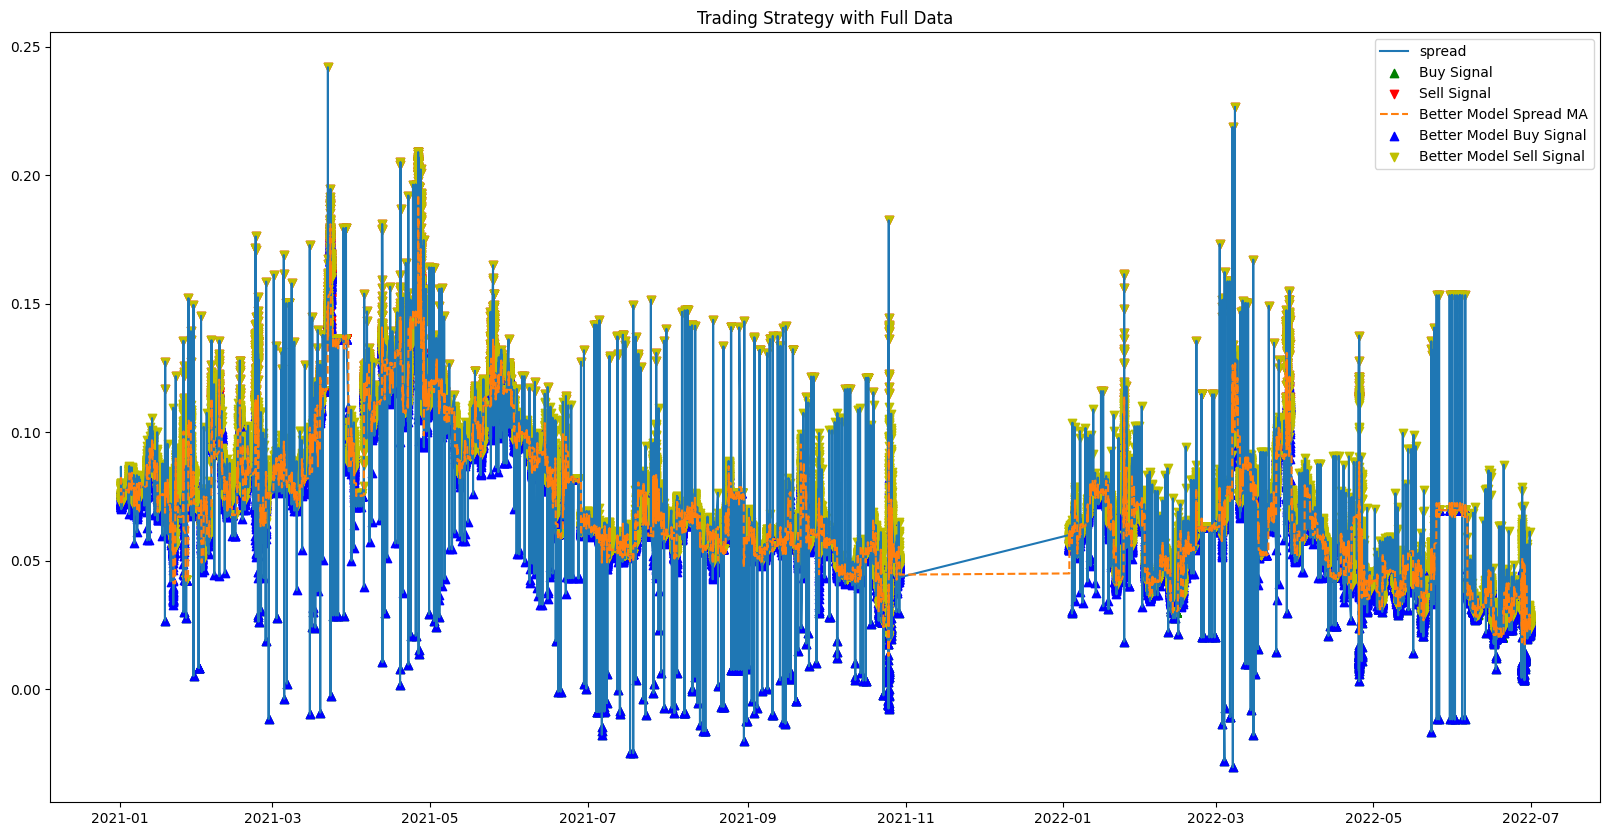

In [263]:
plt.figure(figsize=(20, 10))
plt.plot(data.index, data['spread'], label='spread')
plt.scatter(data[data['Signal'] == 1].index, data[data['Signal'] == 1]['spread'], marker='^', color='g', label='Buy Signal')
plt.scatter(data[data['Signal'] == -1].index, data[data['Signal'] == -1]['spread'], marker='v', color='r', label='Sell Signal')
plt.plot(data.index, data['Better_Model_Spread_MA'], label='Better Model Spread MA', linestyle='--')
plt.scatter(data[data['Better_Model_Signal'] == 1].index, data[data['Better_Model_Signal'] == 1]['spread'], marker='^', color='b', label='Better Model Buy Signal')
plt.scatter(data[data['Better_Model_Signal'] == -1].index, data[data['Better_Model_Signal'] == -1]['spread'], marker='v', color='y', label='Better Model Sell Signal')
plt.legend()
plt.title('Trading Strategy with Full Data')
plt.savefig("Full_Data.png")
plt.show()

In [264]:
# Calculate P/L, Sharpe Ratio, and Drawdown of your strategy.
def calculate_P_L(positions, spread):
    pnl = positions.shift(1) * (spread - spread.shift(1))
    cumulative_pnl = pnl.cumsum()

    daily_returns = pnl / spread.shift(1)
    sharpe_ratio = np.sqrt(252) * daily_returns.mean() / daily_returns.std()

    drawdown = (cumulative_pnl - cumulative_pnl.cummax()).min()

    return {
        'Cumulative P/L': cumulative_pnl.iloc[-1],
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': drawdown
    }

In [265]:
# Calculate
base_model_P_L = calculate_P_L(data['P/L'], data['spread'])
better_model_P_L = calculate_P_L(data['Better_Model_Signal'], data['spread'])

In [266]:
# Print P/L, Sharpe Ratio, and Drawdown
print("Base Model P/L:")
print(base_model_P_L)
print("\nBetter Model P/L:")
print(base_model_P_L)


Base Model P/L:
{'Cumulative P/L': -26.785552670145883, 'Sharpe Ratio': -0.060677269687343514, 'Max Drawdown': -26.786400988028007}

Better Model P/L:
{'Cumulative P/L': -26.785552670145883, 'Sharpe Ratio': -0.060677269687343514, 'Max Drawdown': -26.786400988028007}


In [267]:
# Saving a DataFile in Excel
data.to_excel("trading_strategy.xlsx")

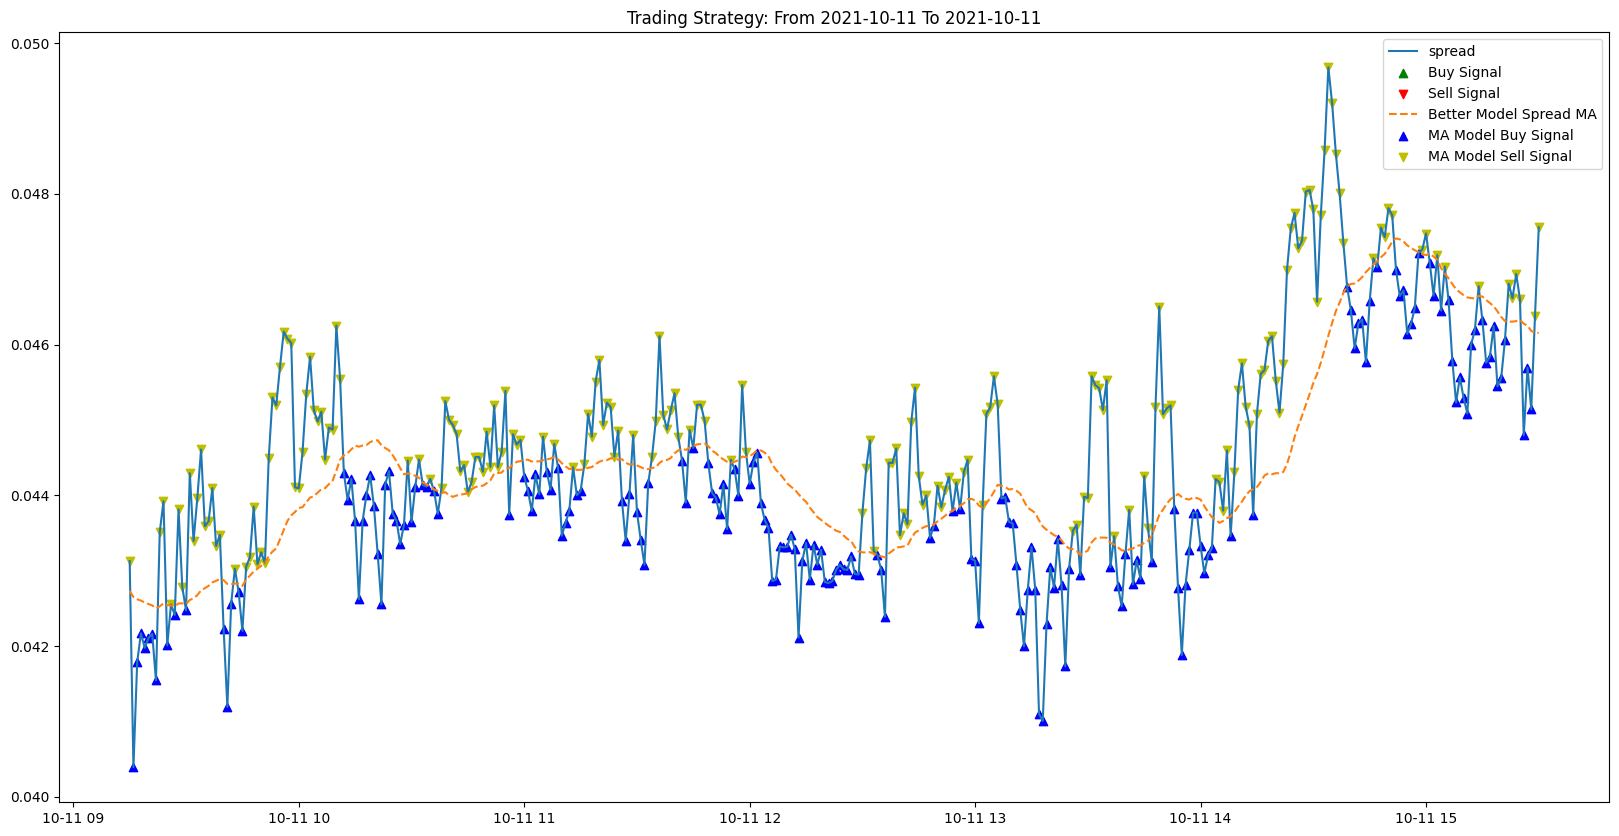

In [268]:
# For using day wise

from datetime import datetime, timedelta
start_date = '2021-10-11'
end_date = '2021-10-11'

data1= data.loc[start_date:end_date]

plt.figure(figsize=(20, 10))
plt.plot(data1.index, data1['spread'], label='spread')
plt.scatter(data1[data1['Signal'] == 1].index, data1[data1['Signal'] == 1]['spread'], marker='^', color='g', label='Buy Signal')
plt.scatter(data1[data1['Signal'] == -1].index, data1[data1['Signal'] == -1]['spread'], marker='v', color='r', label='Sell Signal')
plt.plot(data1.index, data1['Better_Model_Spread_MA'], label='Better Model Spread MA', linestyle='--')
plt.scatter(data1[data1['Better_Model_Signal'] == 1].index, data1[data1['Better_Model_Signal'] == 1]['spread'], marker='^', color='b', label='MA Model Buy Signal')
plt.scatter(data1[data1['Better_Model_Signal'] == -1].index, data1[data1['Better_Model_Signal'] == -1]['spread'], marker='v', color='y', label='MA Model Sell Signal')
plt.legend()
plt.title(f'Trading Strategy: From {start_date} To {end_date}')
plt.savefig("One_day_data.png")
plt.show()